## Name Spaces and Scopes

Assignment statement의 의미: `X = 11`
- X가 name space에 존재하지 않으면 X라는 name을 create하고 `11`이라는 object를 reference
- 존재하면, X라는 name이 새로운 object `11`을 reference

Name space: 이름이 정의되는 공간. dir()로 현재 name space에 있는 name들, 즉 symbol table을 볼 수 있다.

A **scope** refers to a region of a program from where a namespace can be accessed without a prefix.

In [1]:
X = 11

def f():
    print(f, X)   # access global X

def g():
    X = 22
    print('g name space', dir())
    print(g, X)   # access local X
    
def g1():
    global X
    X = 55        # assign to global X

def h1():
    X = 33
    def nested():
        print(nested, X)   # access local X(33)
    nested()

def h2():
    X = 33
    def nested():
        nonlocal X
        X = 44      # change local in enclosing scope
    nested()
    print(h2, X)

f()
g()
g1(); print('after g1', X)
h1()
h2()
print('final', X)

print(__name__, 'name space')
print(dir())

<function f at 0x7fa2b56288c8> 11
g name space ['X']
<function g at 0x7fa2b5628a60> 22
after g1 55
<function h1.<locals>.nested at 0x7fa2bda949d8> 33
<function h2 at 0x7fa2b5628ae8> 44
final 55
__main__ name space
['In', 'Out', 'X', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_ih', '_ii', '_iii', '_oh', 'exit', 'f', 'g', 'g1', 'get_ipython', 'h1', 'h2', 'quit']


In [2]:
class C:
    X = 33           # class attribute (C.X)
    def m(self):
        X = 44       # local variable in method (X)
        self.X = 55  # instance attribute (instance.X)
        
print(C.X)
c = C()
c.m()
print(c.X)

33
55


## Classes and Objects

### Function as data operations

주어진 data에 대해 적용되는 operation을 정의할 수 있다. 

예를 들어 2 차원 좌표를 갖는 point에 대해 ...

In [3]:
## Just one point at a time
Point_x = None
Point_y = None

def set_pos(x, y):
    global Point_x, Point_y
    Point_x = x
    Point_y = y

def display():
    global Point_x, Point_y
    print("x={0}, y={1}".format(Point_x, Point_y))
    
def distance_from_origin():
    global Point_x, Point_y
    return (Point_x **2 + Point_y ** 2) ** 0.5
    
set_pos(4, 5)
display()
print(distance_from_origin())

set_pos(3.2, -5)
display()
print(distance_from_origin())

x=4, y=5
6.4031242374328485
x=3.2, y=-5
5.936328831862332


위 operation은 하나의 data에만 적용된다.

여러 개의 point들에 대해 같은 operation을 적용하려면, 항상 point data를 parameter로 pass해 야 한다.

In [4]:
def Point():
    """Create a point represented by a list of length 2"""
    return [None, None]    

def set_pos(p, x, y):
    p[0] = x
    p[1] = y

def display(p):
    print("x={0}, y={1}".format(p[0], p[1]))
    
def distance(p, q):
    return ((p[0] - q[0])**2 + (p[1] - q[1])**2) ** 0.5
    
p1 = Point()
set_pos(p1, 4, 5)
display(p1)
print(distance(p1, [0, 0]))

p2 = Point()
set_pos(p2, 3.2, -5)
display(p2)
print(distance(p1, p2))

x=4, y=5
6.4031242374328485
x=3.2, y=-5
10.031948963187562


### Classes encapsulate data and its operation. 
Class는 내부에 data(**attribute**이라 한다)와 이들 data에 대한 operation인 **method**를 정의 할 수 있도록 encapsulation한다. 
따라서, Class 내에 있는 data나 function을 class (또는 object) name으로 qualifying해서 access가 가능하다. 예: `Point.x`, `Point.display`
> Python은 data를 완전히 숨기지 않는다. 
> 다시 말해, C나 Java와 달리 class 내의 이름을 *private*로 완전히 가리는 수단은 없다는 뜻이다.
> 만일, class 밖으로 노출하고 싶지 않은 경우, '_' 또는 '__' 로 시작하는 이름을 지어라.

In [5]:
class Point:
    x = None
    y = None

    def set_pos(x, y):
        Point.x = x
        Point.y = y

    def display():
        print("x={0}, y={1}".format(Point.x, Point.y))

    def distance_from_origin():
        return (Point.x **2 + Point.y ** 2) ** 0.5

Point.x = 4
Point.y = 5
Point.display()
print(Point.distance_from_origin())

Point.set_pos(3.2, -5)
Point.display()
print(Point.distance_from_origin())

x=4, y=5
6.4031242374328485
x=3.2, y=-5
5.936328831862332


### Classes and Instances
**Class objects** provide default behavior and serve as factories for instance objects

**Instance objects** are the real objects your programs process—each is a namespace in its own right, but inherits 

> `Point.set_pos(p, 4, 5)` is equivalent to `p.set_pos(4, 5)`

> Preferred notation is *obj.attr* or *obj.method()*.

In [6]:
class Point:
    def set_pos(self, x, y):
        self.x = x
        self.y = y
    
    def to_string(self):
        """Convert instance to a string"""
        return "({0}, {1})".format(self.x, self.y)

    def distance(self, q):
        return ((self.x - q.x)**2 + (self.y - q.y)**2) ** 0.5

p1 = Point()    # a Point class instance
Point.set_pos(p1, 4, 5)

p2 = Point()    # a Point class instance
p2.set_pos(3.2, -5)

print("Distance between {0} and {1} is".format(p1.to_string(), p2.to_string()))
print(p1.distance(p2))

Distance between (4, 5) and (3.2, -5) is
10.031948963187562


### User-defined compound data types
Define a new class

#### Rewriting with constructor(initializer)
`p = Point(x, y)`
- shall create a Point class instance 
- then automatically calls `Point.__init__(p, x, y)`
- returns reference of the instance `p`

#### Converting an instance to a string
add `__str__()` pre-defined special method

In [7]:
class Point:    
    """2D Point class"""
    
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    
    def __str__(self):
        return "({0}, {1})".format(self.x, self.y)

#     def __repr__(self):
#         return "Point({0}, {1})".format(self.x, self.y)

    def distance(self, other):
        return ((self.x - other.x)**2 + (self.y - other.y)**2) ** 0.5

p1 = Point(4, 5)    # a Point class instance
p2 = Point(3.2, -5)    # a Point class instance

print(p1)
print("Distance between {0} and {1} is".format(p1, p2))
print(p1.distance(p2))

(4, 5)
Distance between (4, 5) and (3.2, -5) is
10.031948963187562


In [8]:
str(p1)

'(4, 5)'

In [9]:
p1

**str()**: string of objects
> `print(obj)` / `format(obj)` ==> `str(obj)` ==> `obj.__str__()`

**repr()**: "official" string representation of an object that could be used to recreate the object
> `>>> obj` / `repr(obj)` ==> `obj.__repr__()`

> If `__str__()` method is not defined, `str(obj)` ==> `__repr__()`

### Instance as return values
Function implementation

In [10]:
def midpoint(p1, p2):
    """ Return the midpoint of points p1 and p2 """
    mx = (p1.x + p2.x)/2
    my = (p1.y + p2.y)/2
    return Point(mx, my)

In [11]:
p = Point(3, 4)
q = Point(5, 12)
r = midpoint(p, q)
print(r)

(4.0, 8.0)


Method implementation

In [12]:
class Point:    
    """2D Point class"""
    
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    
    def __str__(self):
        return "({0}, {1})".format(self.x, self.y)

    def __repr__(self):
        return "Point({0}, {1})".format(self.x, self.y)

    def distance(self, other):
        return ((self.x - other.x)**2 + (self.y - other.y)**2) ** 0.5
    
    def midpoint(self, other):
        """ Return the midpoint of points p1 and p2 """
        mx = (self.x + other.x)/2
        my = (self.y + other.y)/2
        return Point(mx, my)

In [13]:
mid_p = Point(3,4).midpoint(Point(5, 12))
mid_p

Point(4.0, 8.0)

### Rectangles

In [14]:
class Rectangle:
    """ A class to manufacture rectangle objects """

    def __init__(self, posn, w, h):
        """ Initialize rectangle at Point posn, with width w, height h """
        self.corner = posn
        self.width = w
        self.height = h

    def __str__(self):
        return  "({0}, {1}, {2})".format(
            self.corner, self.width, self.height)
    
    def __repr__(self):
        return  "Rectangle({0}, {1}, {2})".format(
            repr(self.corner), self.width, self.height)
    
    def grow(self, delta_width, delta_height):
        """ Grow (or shrink) this object by the deltas """
        self.width += delta_width
        self.height += delta_height

    def move(self, dx, dy):
        """ Move this object by the deltas """
        self.corner.x += dx
        self.corner.y += dy

box = Rectangle(Point(0, 0), 100, 200)
bomb = Rectangle(Point(100, 80), 5, 10)    # In my video game
print("box: ", box)
bomb

box:  ((0, 0), 100, 200)


Rectangle(Point(100, 80), 5, 10)

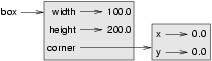

In [15]:
r = Rectangle(Point(10,5), 100, 50)
print(r)
r.grow(25, -10)
print(r)
r.move(-10, 10)
print(r)

((10, 5), 100, 50)
((10, 5), 125, 40)
((0, 15), 125, 40)


### Sameness

In [16]:
p1 = Point(3, 4)
p2 = Point(3, 4)
p1 == p2

False

좌표가 같으면 `p1 == p2`가 `True`가 되도록 method를 추가 해 보자.

### Copying objects

In [17]:
import copy
b1 = Rectangle(Point(0, 0), 100, 200)
b2 = copy.copy(b1)

> This is called **shallow copy**
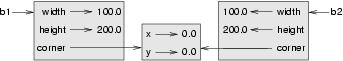

To get a deep copy
> b1 and b3 are completely separate objects.

In [18]:
b3 = copy.copy(b1)

### Special Class Attributes

In [19]:
b1.__class__

__main__.Rectangle

In [20]:
b1.__class__.__name__

'Rectangle'

In [21]:
b1.__dict__    # Attributes are really dict

{'corner': Point(0, 0), 'height': 200, 'width': 100}